<a href="https://colab.research.google.com/github/anumit2004/Supervised-Learning-Models/blob/linear-regression/Build_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This is a custom Simple Linear Regression model with  different algorithms."

**Linear Regression:**

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias


**Gradient Descent**:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

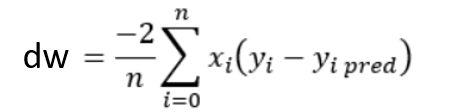

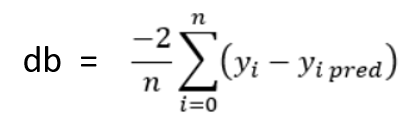

Making Linear Regression with Gradient Descent Algorithm

In [ ]:
import numpy as np

In [ ]:
class Linear_regression():

    #initiating hypreparameters
    def __init__(self,learing_rate,no_of_iterations):
      self.learing_rate=learing_rate
      self.no_of_iterations=no_of_iterations

    def fit(self,x,y):

      self.m,self.n=x.shape

      #initialise weights and bias

      self.w=np.zeros(self.n)
      self.b=0
      self.x=x
      self.y=y
      #apply for gradient descent
      for i in range(self.no_of_iterations):
        self.update()

    def update(self):
      y_pred=self.predict(self.x)
      #calculate gradients:
      err=y_pred-self.y
      """self.x->mx(n+1) matrix and err->mx1 matrix
         so by transposing x it will become (n+1)xm matrix withs mul with mx1  => output will be (n+1)x1 matrix
         here dot is same as matrix multiplication.
      """
      #calculaet weight gradient:
      # dw=(1/self.m)*np.dot(self.x.T,err)  this by dot product
      dw=(1/self.m)*(self.x.T @ err) #  by matrix multiplication   both are same
      #calculate bias gradient:
      db=(1/self.m)*np.sum(err)
      #update weights and bias:
      self.w = self.w-self.learing_rate*dw
      self.b = self.b-self.learing_rate*db

    def predict(self,x):
      return np.dot(x,self.w)+self.b #matrix mul you can use @ here also


**Normal Equation**

Making linear regression model by NORMAL equation  

In [ ]:
class Linear_reg_normal():
  def fit(self,x,y):
    self.x=x
    self.y=y
    self.w=np.linalg.inv(x.T@x)@x.T@y
  def predict(self,x):
    return x@self.w

Testing the algorithm Gredient Descent.

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/sample_data/salary_data (1).csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [ ]:
x.shape

(30, 1)

In [ ]:
y.shape

(30,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
x_train.shape

(21, 1)

In [ ]:
model=Linear_regression(learing_rate=0.02,no_of_iterations=10000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
y_test

array([ 67938,  56642, 101302, 116969,  81363,  61111,  57081,  37731,
        66029])

In [ ]:
print('weight =',model.w[0])
print('bias =' ,model.b)

weight = 9298.415543755238
bias = 27727.29533339432


In [ ]:
y_pred

array([ 73289.53149779,  54692.70041028, 101184.77812906, 116062.24299907,
        82587.94704155,  69570.16528029,  65850.79906279,  41674.91864903,
        75149.21460655])

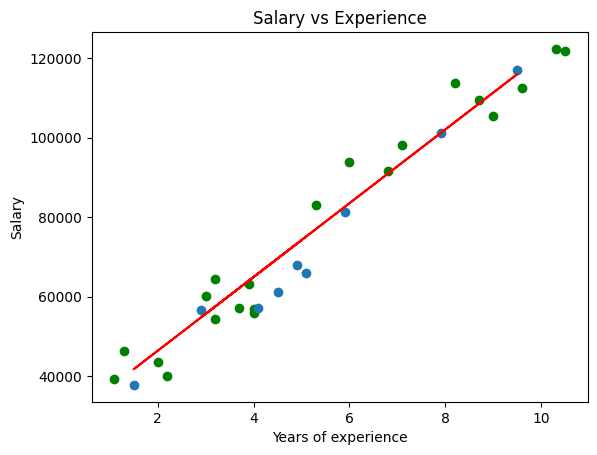

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,c='green')
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

Testing Normal Equation

adding a new feature x0=1

In [ ]:
from sklearn.preprocessing import add_dummy_feature
x_train_dummy=add_dummy_feature(x_train)
x_test_dummy=add_dummy_feature(x_test)

In [ ]:
x_train_dummy

array([[ 1. ,  1.3],
       [ 1. ,  5.3],
       [ 1. ,  9.6],
       [ 1. ,  3.2],
       [ 1. ,  4. ],
       [ 1. ,  2.2],
       [ 1. ,  8.2],
       [ 1. ,  3. ],
       [ 1. ,  6.8],
       [ 1. ,  3.7],
       [ 1. ,  4. ],
       [ 1. , 10.5],
       [ 1. ,  6. ],
       [ 1. ,  7.1],
       [ 1. ,  1.1],
       [ 1. ,  3.2],
       [ 1. , 10.3],
       [ 1. ,  2. ],
       [ 1. ,  9. ],
       [ 1. ,  8.7],
       [ 1. ,  3.9]])

In [ ]:
x_train_dummy.shape

(21, 1)

In [ ]:
nmodel=Linear_reg_normal()
nmodel.fit(x_train_dummy,y_train)

In [ ]:
nmodel.w

array([27727.29533339,  9298.41554376])

In [ ]:
print('weights =',nmodel.w[1])
print('bias =',nmodel.w[0])

weights = 9298.415543755182
bias = 27727.295333394657


In [ ]:
y_pred_nor=nmodel.predict(x_test_dummy)
y_pred_nor

array([ 73289.5314978 ,  54692.70041028, 101184.77812906, 116062.24299907,
        82587.94704155,  69570.16528029,  65850.79906279,  41674.91864903,
        75149.21460655])

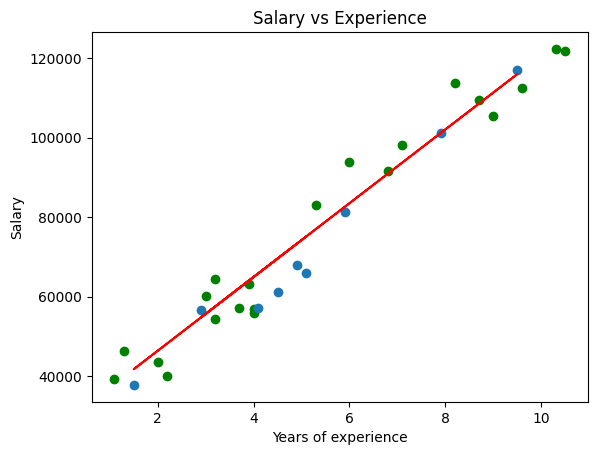

In [ ]:
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_nor,color='red')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

They are giving completely same output with two different approach .